In [34]:
#importing the necessary packages
import pandas as pd
import glob 
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt


In [13]:
#loading the data
files = glob.glob("C:/Users/devli/sghousing/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [17]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915274 entries, 0 to 915273
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  object 
 1   town                 915274 non-null  object 
 2   flat_type            915274 non-null  object 
 3   block                915274 non-null  object 
 4   street_name          915274 non-null  object 
 5   storey_range         915274 non-null  object 
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  object 
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
 10  remaining_lease      206224 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.8+ MB


In [18]:
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  408 labels
town :  27 labels
flat_type :  8 labels
block :  2699 labels
street_name :  584 labels
storey_range :  25 labels
floor_area_sqm :  210 labels
flat_model :  34 labels
lease_commence_date :  56 labels
resale_price :  9346 labels
remaining_lease :  720 labels


In [19]:
# Null values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [20]:
df = df.drop(columns='remaining_lease')
# After droping the column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

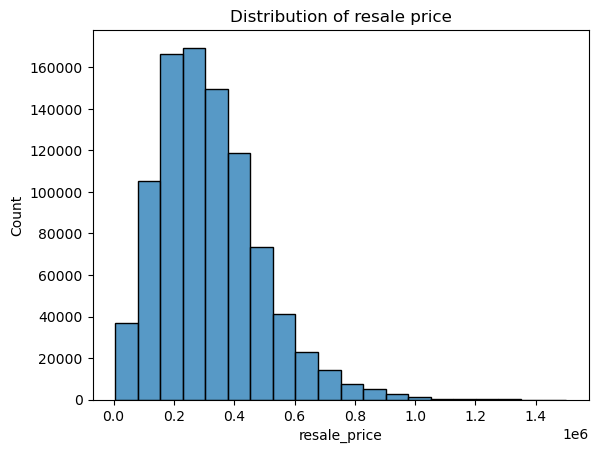

In [27]:
#checking for skew in resale price 
sns.histplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')
plt.show()


In [28]:
df['flat_type'].value_counts()

flat_type
4 ROOM              347255
3 ROOM              293071
5 ROOM              192701
EXECUTIVE            68921
2 ROOM               11487
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       260
Name: count, dtype: int64

In [29]:
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [30]:
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

flat_type
4    347255
3    293071
5    192701
6     68921
2     11487
1      1300
7       539
Name: count, dtype: int64

In [31]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [32]:
df['flat_model'] = df['flat_model'].str.lower()

In [35]:
le = preprocessing.LabelEncoder()

flat_modelcode= le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [36]:
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [37]:
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()


,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [38]:
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [39]:
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [40]:
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [41]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


In [42]:
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']].astype('int')
df.dtypes

month                   object
selling_year             int32
selling_month            int32
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min               int32
storey_max               int32
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

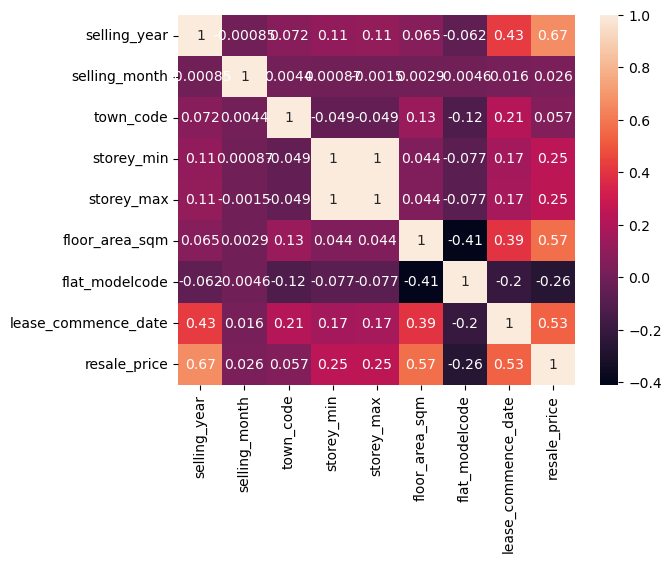

In [43]:
corr_df = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True)

In [45]:
X = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date']]
y = df['resale_price']

In [47]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [49]:
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)
score = lin_reg.score(X_test,y_test)
print(score)

0.7551617804754633


In [51]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)
score = Dt_reg.score(X_test,y_test)
print(score)

0.9600838436234383


In [54]:
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)
score = rf_reg.score(X_test,y_test)
print(score)


0.9742555614239539


In [55]:
#saving the model
import pickle

with open("resale_rfr_pkl","wb") as files:
  pickle.dump(rf_reg, files)

In [57]:
df.to_csv('data.csv',index=False)